#                                                         IPL 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

In [3]:
deliveries=pd.read_csv('deliveries.csv')

In [2]:
matches=pd.read_csv('matches.csv')

In [5]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# what is the percentage of  matches played in each city and also  compare with other season also

In [17]:
temp = matches.groupby(['season','city'])['id'].count()
c = 0
for i in matches['season'].unique():
    print(sum(temp[i]))

59
58
57
60
73
74
76
53
59
60
60
60
749
id                 756
season             756
city               749
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             752
win_by_runs        756
win_by_wickets     756
player_of_match    752
venue              756
umpire1            754
umpire2            754
umpire3            119
dtype: int64


In [8]:
temp = matches.set_index("date")
temp.sort_index(inplace=True)
temp.index = pd.to_datetime(temp.index)

In [10]:
temp.sort_index(inplace=True)

In [21]:
d = {}
for i in matches['team1'].unique():
    d.setdefault(i,0)
for i in temp.index:
    if str(i).split("-")[1]=="04":
        print(i)
        print(temp.loc(str(i).split()[0]))

2008-04-18 00:00:00


ValueError: No axis named 2008-04-18 for object type DataFrame

In [50]:
matches[(matches['toss_winner']=="Rajasthan Royals") & (matches["toss_decision"]=="bat")]['winner'].apply(lambda x : 1 if x=="Rajasthan Royals" else 0).sum()

15

In [65]:
matches['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

# how a toss decision in each city impacts the game.

In [51]:
def decision(row):
    if row['toss_winner'] == row['winner']:
        if row['toss_decision']=='bat':
            val = 1
        else:
            val = 0
    else:
        if row['toss_decision'] == 'bat':
            val = 0
        else:
            val = 1
    return val
matches['decision'] = matches.apply(decision, axis=1)

In [54]:
total = matches.groupby('city')['id'].count()

city
Abu Dhabi           7
Ahmedabad          12
Bangalore          66
Bengaluru          14
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         46
Chennai            57
Cuttack             7
Delhi              74
Dharamsala          9
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            77
Mohali             10
Mumbai            101
Nagpur              3
Port Elizabeth      7
Pune               38
Raipur              6
Rajkot             10
Ranchi              7
Sharjah             6
Visakhapatnam      13
Name: id, dtype: int64

In [7]:
matches.groupby()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,decision
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,bat
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,field
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,field
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,field
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,bat


# in which season, maximum number of teams had participated in ipl.

In [18]:
matches.groupby('season')['team1'].unique().apply(lambda x: len(x)).idxmax()

2011

# in which season, maximum number of matches had played and how many matches had played in that season by each team

In [58]:
print(matches.groupby('season')['id'].count().idxmax())
d = {}
for i in matches[matches['season']==matches.groupby('season')['id'].count().idxmax()].index:
    if matches.loc[i,'team1'] not in d.keys():
        d[matches.loc[i,'team1']] = 1
    else:
        d[matches.loc[i,'team1']]+=1
    if matches.loc[i,'team2'] not in d.keys():
        d[matches.loc[i,'team2']] = 1
    else:
        d[matches.loc[i,'team2']]+=1
for i,j in d.items():
    print(i,j)

2013
Delhi Daredevils 16
Kolkata Knight Riders 16
Royal Challengers Bangalore 16
Mumbai Indians 19
Sunrisers Hyderabad 17
Pune Warriors 16
Rajasthan Royals 18
Chennai Super Kings 18
Kings XI Punjab 16


# toss winner is also match winner

In [62]:
((matches[matches['toss_winner']==matches['winner']].__len__())/matches.__len__())*100

51.98412698412699

In [59]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [62]:
temp = matches[(matches['team1']=="Chennai Super Kings") | (matches['team1']=="Chennai Super Kings")]
(temp[temp['winner']=="Chennai Super Kings"].__len__()/len(temp))*100  

57.30337078651685

# most common venue in which MS Dhoni was player of the match

In [64]:
matches[matches['player_of_match']=="MS Dhoni"]['venue'].value_counts().index[0]

'M Chinnaswamy Stadium'

In [42]:
matches[(matches['city']=="Hyderabad") & (matches['toss_decision']=="bat")]['win_by_runs'].apply(lambda x:1 if x!=0 else 0).sum()

6

In [38]:
matches[matches['toss_decision']=="bat"]['city']=="Hyderabad"

season
2017    Bangalore
2017       Indore
2017        Delhi
2017        Delhi
2017    Hyderabad
          ...    
2019        Delhi
2019       Mumbai
2019        Delhi
2019      Chennai
2019    Hyderabad
Name: city, Length: 293, dtype: object

In [20]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
matches['team2'].unique().__len__()

15

In [21]:
matches.set_index('season',inplace=True)

In [22]:
matches.sort_index()

,id,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
season,,,,,,,,,,,,,,,,,
2008,117,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
2008,83,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
2008,82,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
2008,81,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
2008,80,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,11317,Kolkata,12/04/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,S Dhawan,Eden Gardens,Yeshwant Barde,O Nandan,Rod Tucker
2019,11318,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
2019,11319,Mohali,13/04/19,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,AB de Villiers,IS Bindra Stadium,S Ravi,Ulhas Gandhe,Nigel Llong


In [8]:
#replacing team names with abbrevations

In [9]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

### General Analysis

##### total matches played 


In [11]:
total_matches=matches.shape[0]
print('total matches played so far are:',total_matches)

total matches played so far are: 636


In [7]:
matches[matches['player_of_match']=="MS Dhoni"]['venue'].value_counts().index[0]

'M Chinnaswamy Stadium'

In [8]:
matches[matches['player_of_match']=="MS Dhoni"]['venue'].value_counts()

M Chinnaswamy Stadium                                  4
MA Chidambaram Stadium, Chepauk                        3
M. A. Chidambaram Stadium                              2
Buffalo Park                                           1
Himachal Pradesh Cricket Association Stadium           1
Subrata Roy Sahara Stadium                             1
Maharashtra Cricket Association Stadium                1
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    1
Eden Gardens                                           1
Feroz Shah Kotla                                       1
Sawai Mansingh Stadium                                 1
Name: venue, dtype: int64

##### venues


In [28]:
venues=matches['city'].unique()


print('Venues are',venues)

Venues are ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


##### teams

In [30]:
teams=matches['team1'].unique()
print('teams so far are',teams)

teams so far are ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


##### umpires

In [31]:
umpire=matches['umpire1'].unique()
print('umpires are',umpire)

umpires are ['AY Dandekar' 'A Nand Kishore' 'Nitin Menon' 'AK Chaudhary' nan
 'A Deshmukh' 'KN Ananthapadmanabhan' 'YC Barde' 'S Ravi' 'CB Gaffaney'
 'M Erasmus' 'NJ Llong' 'CK Nandan' 'Asad Rauf' 'MR Benson' 'Aleem Dar'
 'SJ Davis' 'BF Bowden' 'IL Howell' 'DJ Harper' 'RE Koertzen'
 'BR Doctrove' 'AV Jayaprakash' 'BG Jerling' 'HDPK Dharmasena' 'S Asnani'
 'GAV Baxter' 'SS Hazare' 'K Hariharan' 'SL Shastri' 'SK Tarapore'
 'SJA Taufel' 'S Das' 'AM Saheba' 'PR Reiffel' 'JD Cloete' 'VA Kulkarni'
 'BNJ Oxenford' 'C Shamshuddin' 'RK Illingworth' 'RM Deshpande'
 'K Srinath' 'SD Fry' 'PG Pathak' 'K Bharatan']


##### most man of the match

In [32]:
manofmatch=(matches['player_of_match'].value_counts()).idxmax()
print('most man of the match title winner is',manofmatch)

most man of the match title winner is CH Gayle


##### most winning team 

In [34]:
mostwins=(matches['winner'].value_counts()).idxmax()
print('Most winning team is',mostwins)

Most winning team is MI


##### Highest run differnce 

In [35]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [36]:
#Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

##### Highest win by wickets

In [46]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


In [37]:
#Kolkata Knight Riders(KKR) defeated Gujrat Lions(GL) with the highest wins by wickets

### Toss Decision

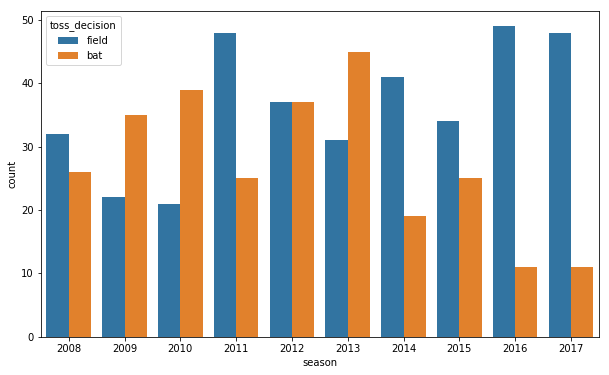

In [47]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

In [ ]:
#choosing of batting or fielding varies over the seasons

### max toss winner

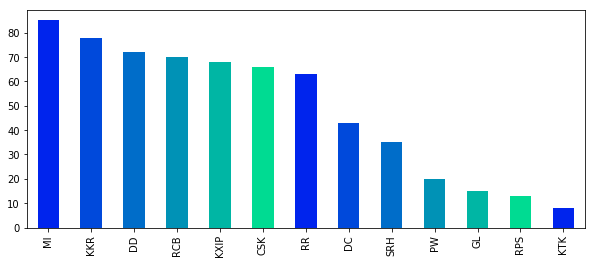

In [66]:
plt.figure(figsize=(10,4))
matches['toss_winner'].value_counts().plot(kind='bar',color=sns.color_palette('winter'))
plt.show()

In [39]:
matches['toss_winner'].value_counts().max()

85

In [ ]:
#Mumbai Indians won the toss maximum times i.e 85

### match winner also toss winner

In [42]:
df=matches[matches['toss_winner']==matches['winner']]

In [43]:
slices=[len(df),len(matches)-len(df)]

In [44]:
labels=['yes','no']

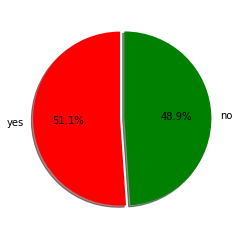

In [47]:
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
plt.show()

In [46]:
#Thus the toss winner is not necessarily the match winner.

### Matches played accross each season

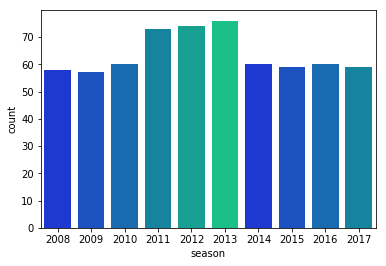

In [183]:
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))
plt.show()

### Total runs across each season

In [48]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [49]:
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

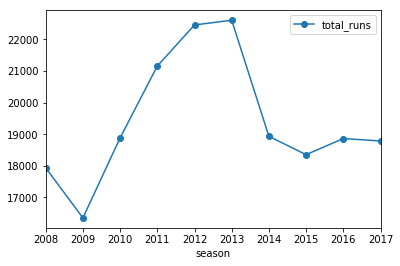

In [50]:
season.set_index('season').plot(marker='o')
plt.show()

In [52]:
#There was a decline in total runs from 2008 to 2009.But there after there was a substantial increase in runs in every season until 2013, but from next season there was a slump in the total runs. But the number of matches are not equal in all seasons. We should check the average runs per match in each season

[   season  matches  total_runs  average_runs_per_match
0    2008       58       17937              309.258621
1    2009       57       16353              286.894737
2    2010       60       18883              314.716667
3    2011       73       21154              289.780822
4    2012       74       22453              303.418919
5    2013       76       22602              297.394737
6    2014       60       18931              315.516667
7    2015       59       18353              311.067797
8    2016       60       18862              314.366667
9    2017       59       18786              318.406780]


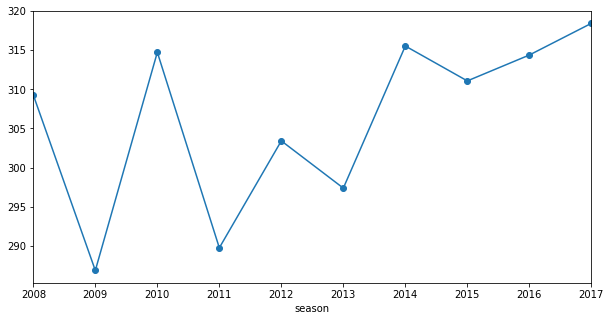

In [51]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()

avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']

avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
print([avgruns_each_season])
plt.figure(figsize=(10,5))
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.show()

### sixes and fours each season

In [53]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()

In [54]:
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'sixes','batsman_runs_y':'fours'})

In [55]:
Season_boundaries

,season,sixes,fours
0,2008,623,1703
1,2009,508,1321
2,2010,587,1709
3,2011,639,1916
4,2012,733,1911
5,2013,681,2054
6,2014,715,1563
7,2015,692,1611
8,2016,639,1633
9,2017,706,1612


<Figure size 1080x360 with 0 Axes>

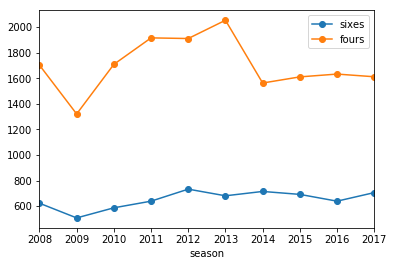

In [61]:
plt.figure(figsize=(15,5))
Season_boundaries.set_index('season')[['sixes','fours']].plot(marker='o')
plt.show()


### Favourite ground

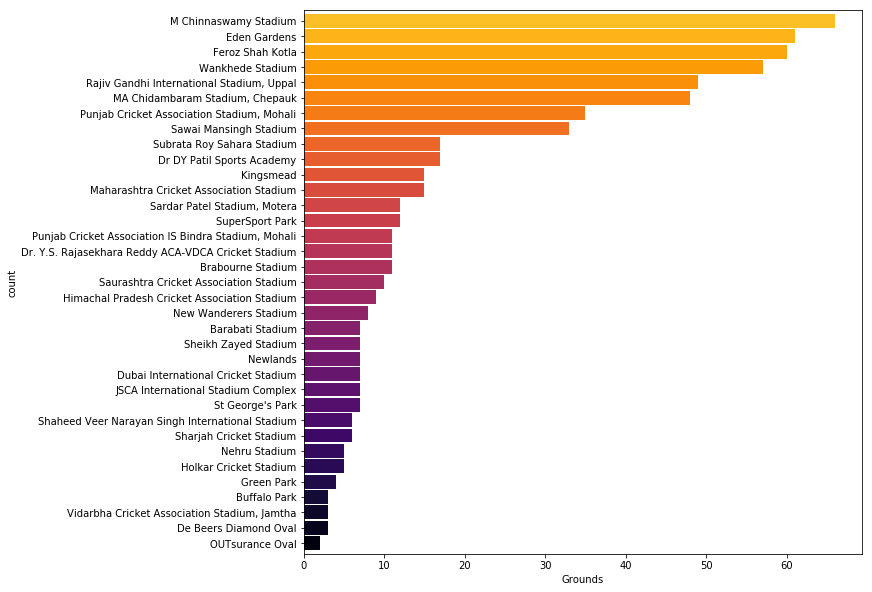

In [128]:
plt.subplots(figsize=(10,10))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

### Maximum Man Of Matches

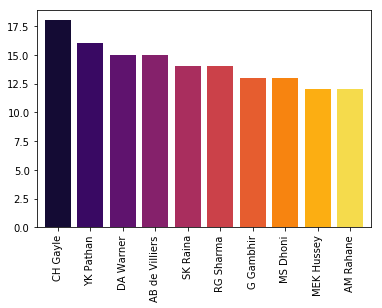

In [129]:
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))

In [62]:
 matches['player_of_match'].value_counts().max()

18

In [63]:
#CH Gayle won the maximum man of the match title i.e 18 times

### Winners Of IPL 

In [65]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


### Superover

In [66]:
print('\n Total Matches with Super Overs:',deliveries[deliveries['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


### Umpires

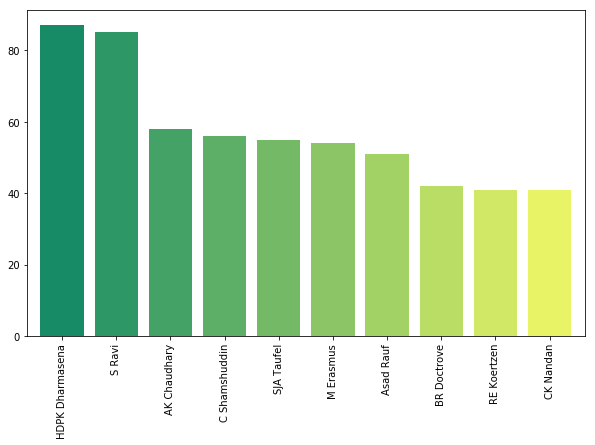

In [67]:
plt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))

In [68]:
ump.value_counts().max()

87

In [69]:
#HDPK Dharmasena has been chosen as umpire most of the times i.e 87

### A comparision between 2 teams

In [76]:
#Here we will check the matches played between 2 teams and which had won more matches each year

In [72]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask].winner.value_counts().to_frame().T
        print(mt2)
        
    


In [73]:
comparator('MI')

        MI  KKR
winner  16    5
        MI  RCB
winner  13    8
        MI  DC
winner   6   4
        MI  CSK
winner  12   10
        MI  RR
winner  10   6
        MI  DD
winner  11   9
        GL  MI
winner   2   2
        KXIP  MI
winner    10  10
        SRH  MI
winner    5   5
        RPS  MI
winner    4   2
        KTK
winner    1
        MI  PW
winner   5   1


### Score Distribution For Teams by Innings

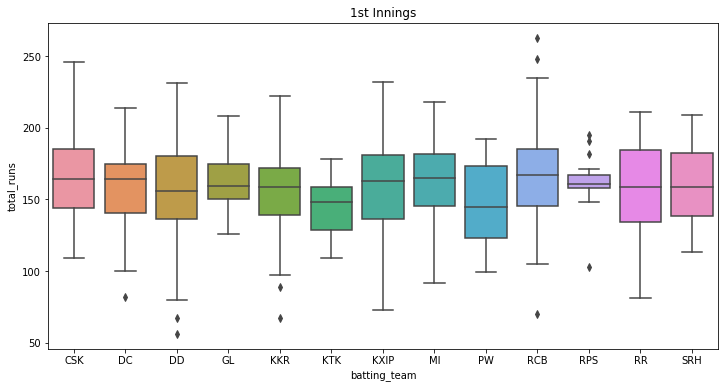

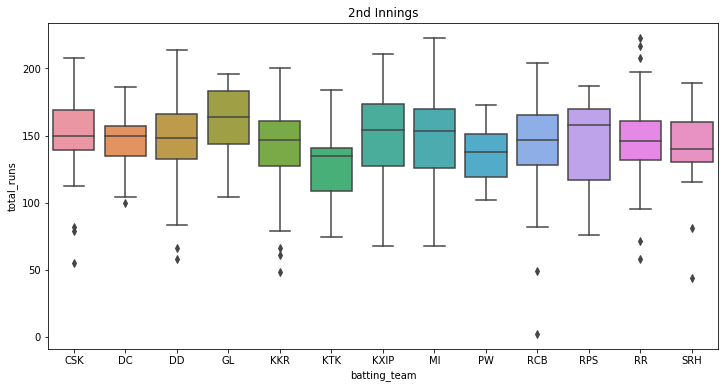

In [74]:
plt.subplots(figsize=(12,6))
xyz=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
plt.subplots(figsize=(12,6))
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
plt.show()

In [77]:
#ccording to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.

#In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted.

### 200+ runs

In [75]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


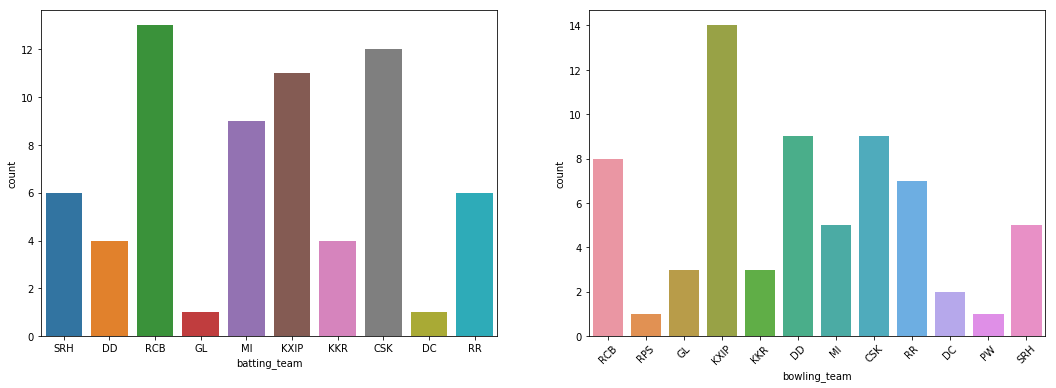

In [14]:
fig, ax =plt.subplots(1,2)

sns.countplot(high_scores['batting_team'],ax=ax[0])

sns.countplot(high_scores['bowling_team'],ax=ax[1])
plt.xticks(rotation=45)

fig.set_size_inches(18,6)
plt.show()

In [79]:
#The graph on the left shows the number of times a team has scored above 200 runs.
#The graph on the right shows the number of times a bowling team has conceeded above 200 runs.

In [80]:
print('Teams who have"nt ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who haven"t conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have"nt ever scored 200 runs ['PW', 'KTK', 'RPS']
Teams who haven"t conceeded over 200 while bowling ['KTK']


In [16]:
high=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [17]:
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()

263

In [18]:
high.columns

Index(['inning', 'batting_team', 'bowling_team', 'total_runs'], dtype='object')

In [19]:
high=high.rename(columns={'total_runs':'count'})

In [20]:
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()

In [21]:
high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

In [81]:
#The above dataframe shows the number of times a team has scored above 200 runs against another team.

### Chances of chasing 200+ target

In [84]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [85]:
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]

In [86]:
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')

In [87]:
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)

In [88]:
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]

In [89]:
high_scores1['is_score_chased']=1

In [90]:
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,1
8,9,1,DD,RPS,205,2,108,1
19,20,1,RCB,GL,213,2,192,1
31,32,1,SRH,KXIP,207,2,181,1
35,36,1,SRH,KKR,209,2,161,1


In [91]:
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 'yes','no')

In [92]:
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


In [93]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased


In [94]:
slices

0    42
1     7
Name: is_score_chased, dtype: int64

In [95]:
list(slices)


[42, 7]

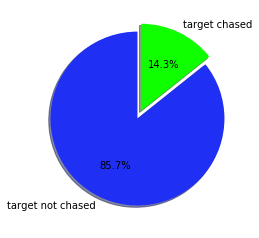

In [97]:
labels=['target not chased','target chased']
plt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')


plt.show()

In [103]:
#It seems to be clear that team batting first and scoring 200+ runs, has a very high probablity of winning the match.

### Top 10 batsman

In [98]:
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()

In [99]:
max_runs.sort_values(ascending=False)[:10]

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

In [100]:
y=max_runs.sort_values(ascending=False)[:10]

In [101]:
batsman=list(y.index)

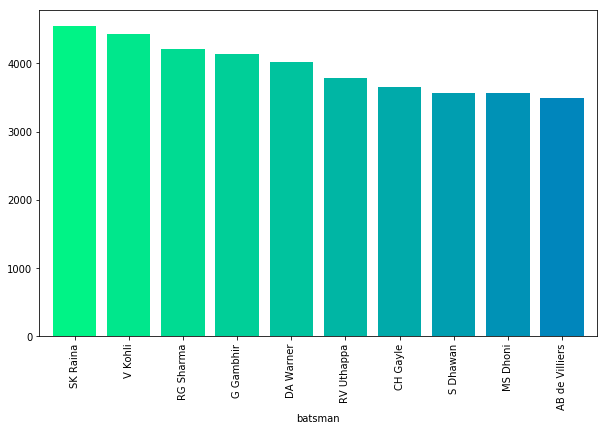

In [102]:
plt.subplots(figsize=(10,6))
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))

### Most number of 1 2 4 and 6 

In [105]:
toppers=deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')

In [106]:
toppers.head()

batsman_runs,0,1,2,3,4,5,6
batsman,,,,,,,
A Ashish Reddy,61.0,83.0,20.0,1.0,16.0,NaN,15.0
A Chandila,3.0,4.0,NaN,NaN,NaN,NaN,NaN
A Chopra,45.0,21.0,2.0,NaN,7.0,NaN,NaN
A Choudhary,4.0,13.0,1.0,NaN,1.0,NaN,1.0
A Flintoff,24.0,23.0,2.0,1.0,5.0,NaN,2.0


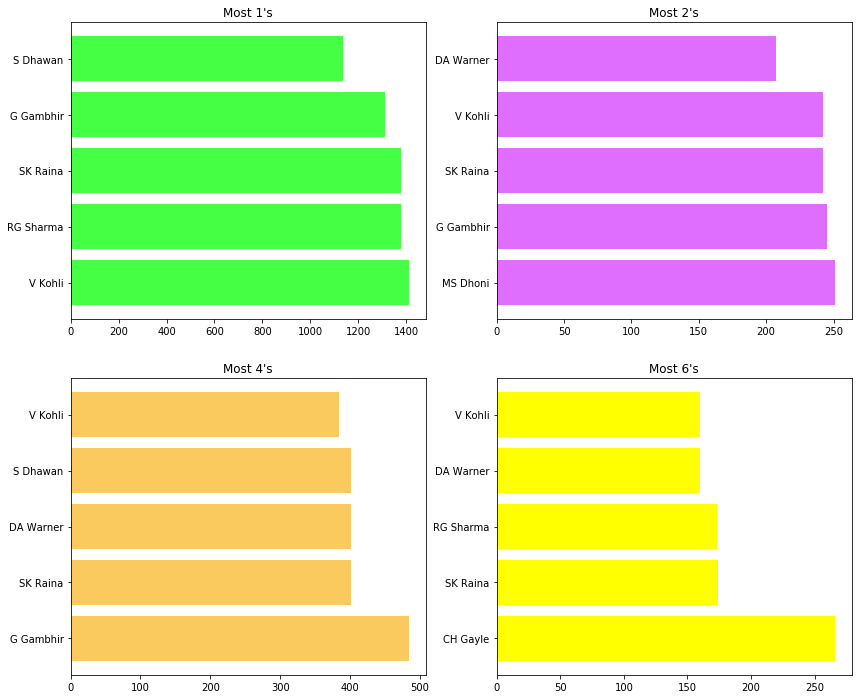

In [108]:
fig,ax=plt.subplots(2,2,figsize=(14,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
plt.show()

In [110]:
#Observations:

#Kohli has scored the maximum 1's
#Dhoni has the maximum 2's . 
#Gambhir has the maximum 4's.
#C Gayle has the maximum 6's and he leads by a big margin.

### Top scores

In [78]:
top_scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


### Individual Scores By Top Batsman each Inning

In [81]:
x=top_scores.nlargest(10,'batsman_runs')

In [125]:
swarm=list(x['batsman'])

In [86]:
scores = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()

In [87]:
scores=scores[top_scores['batsman'].isin(swarm)]

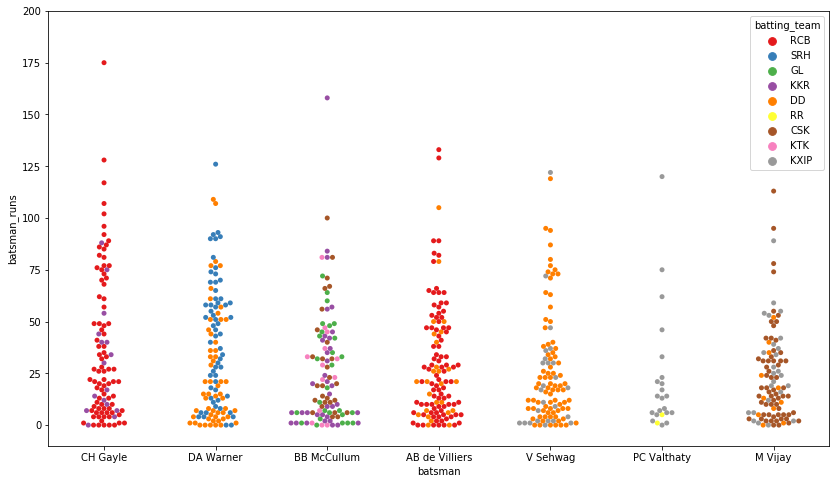

In [93]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
plt.ylim(-10,200)
plt.show()


In [111]:
#Observations:

#Chris Gayle has the highest Individual Score of 175 and Highest Number of Centuries i.e 5
#MS Dhoni and Gautam Gambhir have never scored a Century.
#V Kohli has played only for 1 IPL Team in all seasons i.e RCB

### Frequency of Scores

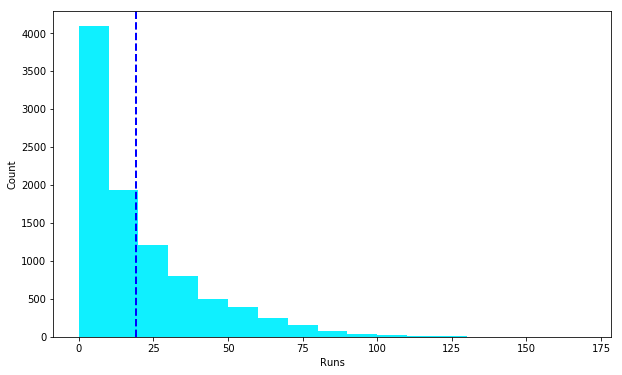

In [94]:
plt.subplots(figsize=(10,6))
bins=range(0,180,10)
plt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Runs')
plt.ylabel('Count')
plt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.plot()
plt.show()

In [112]:
#The average score for a batsman is around 19-20.
#Also the number of single digit score is quite high and the number of centuries is low.

### top wicket takers

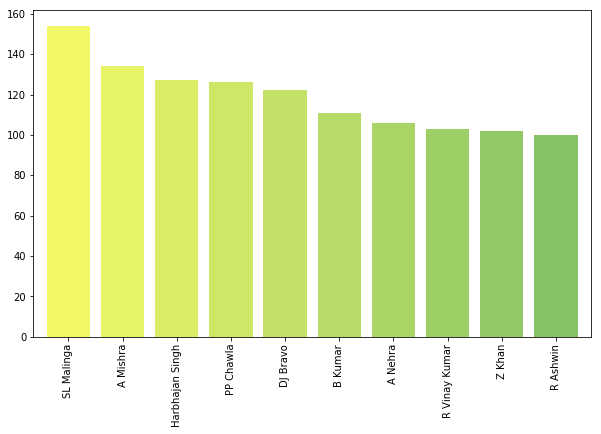

In [95]:
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
plt.show()

In [96]:
ct['bowler'].value_counts()[:10]

SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             102
R Ashwin           100
Name: bowler, dtype: int64

In [114]:
#Lasith Malinga leads the chart, thanks to his unpredictable bowling action. 
#Other bowlers have a very small wicket margin between them.

### Maximum Overs

In [99]:
eco=deliveries.groupby(['bowler']).sum()
eco['total balls']=deliveries['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432


### Most Economical Bowlers with 300+ overs

In [100]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,SP Narine,R Ashwin,DW Steyn,SL Malinga,Harbhajan Singh,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.39571,6.49364,6.6156,6.75724,6.93373,7.04678,7.34444,7.40432,7.54617,7.61276


### Highest Dismissals for a Batsman by a Bowler

In [148]:
gayle=deliveries[deliveries['batsman']=='CH Gayle']
gayle=gayle[gayle['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gayle=gayle.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gayle['batsman']='CH Gayle'


In [149]:
for i in batsman:
    temp=deliveries[deliveries['batsman']==i]
    temp=temp[temp['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
    temp=temp.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
    temp['batsman']=i
    #print(temp['batsman'])
    gayle=gayle.append(temp)
    

    

In [150]:
gayle

,bowler,dismissal_kind,batsman
0,R Ashwin,4,CH Gayle
0,Harbhajan Singh,5,SK Raina
0,A Nehra,6,V Kohli
0,R Vinay Kumar,6,RG Sharma
0,Z Khan,6,G Gambhir
0,L Balaji,3,DA Warner
0,A Mishra,4,RV Uthappa
0,R Ashwin,4,CH Gayle
0,Z Khan,4,S Dhawan
0,Z Khan,7,MS Dhoni


### wickets

In [153]:
dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismiss)]
bx=ct.dismissal_kind.value_counts()[:10]


In [154]:
bx

caught               4373
bowled               1382
run out               755
lbw                   455
stumped               243
caught and bowled     211
hit wicket              9
Name: dismissal_kind, dtype: int64

In [157]:
list(bx)

[4373, 1382, 755, 455, 243, 211, 9]

In [158]:
list(bx.index)

['caught',
 'bowled',
 'run out',
 'lbw',
 'stumped',
 'caught and bowled',
 'hit wicket']

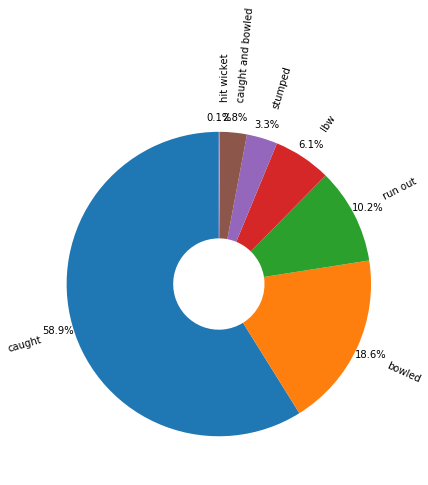

In [190]:
plt.figure(figsize=(10,7))
plt.pie(x=list(bx),labels=list(bx.index),startangle=90,autopct='%1.1f%%',pctdistance=1.1,
        wedgeprops=dict(width=0.7),labeldistance=1.2,rotatelabels=True)
plt.show()

In [191]:
extras=['wide_runs','bye_runs','legbye_runs','noball_runs']

In [192]:
deliveries['wide_runs'].sum()

5642

In [193]:
size=[]
for i in extras:
    size.append(deliveries[i].sum())

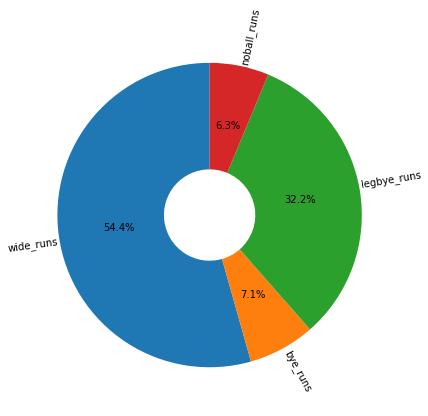

In [197]:
plt.figure(figsize=(10,7))
plt.pie(x=size,labels=extras,startangle=90,autopct='%1.1f%%',
        wedgeprops=dict(width=0.7),labeldistance=1.0,rotatelabels=True)
plt.show()

### Teams with maximum Boundaries

In [116]:
ax=deliveries[deliveries['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=deliveries[deliveries['batsman_runs']==4].batting_team.value_counts().reset_index()

In [117]:
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')

In [118]:
ax

,index,batting_team_x,batting_team_y
0,RCB,935,1978
1,MI,876,2145
2,KXIP,762,2083
3,CSK,742,1770
4,DD,686,1970
5,KKR,659,1978
6,RR,538,1630
7,DC,400,957
8,SRH,364,999
9,PW,196,525


In [119]:
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)


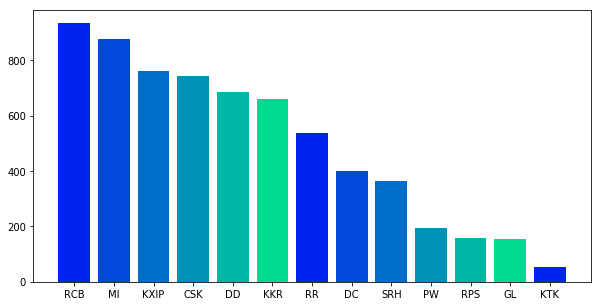

In [123]:
plt.figure(figsize=(10,5))
plt.bar(ax['team'],height=ax["6's"],color=sns.color_palette('winter'))
plt.show()

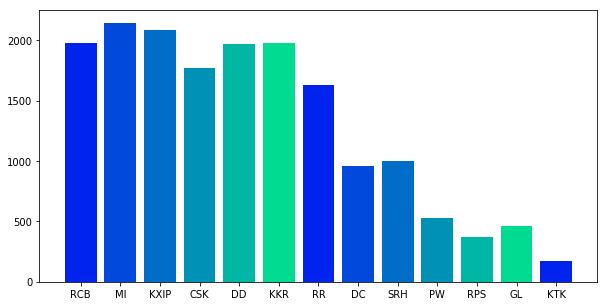

In [122]:
plt.figure(figsize=(10,5))
plt.bar(ax['team'],height=ax["4's"],color=sns.color_palette('winter'))
plt.show()

In [46]:
c = int(input("Enter cost of the production: "))
a = int(input("Enter price of a seat in band-A: "))
b = int(input("Enter price of a seat in band-B: "))
while c!=(10*a+10*b):
    print()
    print("Ratio of cost and total price is",c/(10*a+10*b))
    c = int(input("Enter cost of the productio: "))
    a = int(input("Enter price of a seat in band-A: "))
    b = int(input("Enter price of a seat in band-B: "))
print()
print("final cost is: ",c)
print("final price of a seat in band-A is: ",a)
print("final price of a seat in band-B is: ",b)

Enter cost of the production: 50
Enter price of a seat in band-A: 2
Enter price of a seat in band-B: 4

Ratio of cost and total price is 0.8333333333333334
Enter cost of the productio: 50
Enter price of a seat in band-A: 4
Enter price of a seat in band-B: 3

Ratio of cost and total price is 0.7142857142857143
Enter cost of the productio: 50
Enter price of a seat in band-A: 3
Enter price of a seat in band-B: 3

Ratio of cost and total price is 0.8333333333333334
Enter cost of the productio: 50
Enter price of a seat in band-A: 3
Enter price of a seat in band-B: 4

Ratio of cost and total price is 0.7142857142857143
Enter cost of the productio: 50
Enter price of a seat in band-A: 2
Enter price of a seat in band-B: 3

final cost is:  50
final price of a seat in band-A is:  2
final price of a seat in band-B is:  3


In [18]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
for i in matches.columns():
    matches['i'] = matches[i].apply(lambda x: round(x,2))